# AAAIV

In [1]:
import sys
sys.executable
import sys
print(sys.path)

['/home/agata/ERASMUS/asignaturas/aprendisaje_Imagenes', '/home/agata/ERASMUS/asignaturas/aprendisaje_Imagenes', '/opt/Softbank Robotics/Choregraphe Suite 2.8/lib/naoqi', '/home/agata/anaconda3/lib/python39.zip', '/home/agata/anaconda3/lib/python3.9', '/home/agata/anaconda3/lib/python3.9/lib-dynload', '', '/home/agata/.local/lib/python3.9/site-packages', '/home/agata/anaconda3/lib/python3.9/site-packages', '/home/agata/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg']


In [9]:

import pandas as pd
import cv2 as cv
import numpy as np
#import keras
import matplotlib.pyplot as plt
#import tensorflow as tf
#from keras.datasets import cifar10



In [ ]:
#import keras

CIFAR-10. Este conjunto de datos consta de 60.000 imágenes diminutas de 32 píxeles de alto y ancho. Cada imagen está etiquetada con una de las 10 clases (por ejemplo, “avión, automóvil, pájaro, etc.”). Estas 60.000 imágenes se dividen en un conjunto de entrenamiento de 50.000 imágenes y un conjunto de prueba de 10.000 imágenes. 

In [4]:
(Xtr, Ytr), (Xte, Yte) = tf.keras.datasets.cifar10.load_data()


# Se adapatan las imagenes 
Xtr_rows = Xtr.reshape(Xtr.shape[0], 32 * 32 * 3) # Xtr_rows sen convierte a 50000 x 3072
Xte_rows = Xte.reshape(Xte.shape[0], 32 * 32 * 3) # Xte_rows convierte de  10000 x 3072 '''

ModuleNotFoundError: No module named 'google.protobuf'

Podemos visualizar 22 imágenes de la base de datos:

In [ ]:
fig, ax = plt.subplots(2,11)
n=0
for i in range(22) :
    ax[n,i-(n*11)].imshow(Xtr[i,:])
    ax[n,i-(n*11)].title.set_text(Ytr[i])
    if (i == 10):
        n=n+1
 

    

# Histograma

Podemos evaluar la exposición de una foto en cada uno de los canales de la imagen:

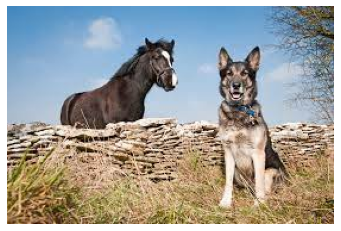

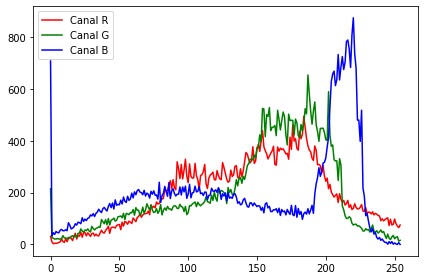

In [15]:
import cv2 as cv
image = cv.imread('horse_dog.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure()
plt.axis("off")
plt.imshow(image) 
plt.show()

#print(image)


sel = image
#plt.imshow(sel)
histg1 = cv.calcHist([sel],[0],None,[255],[0,255]) 
histg2 = cv.calcHist([sel],[1],None,[255],[0,255]) 
histg3 = cv.calcHist([sel],[2],None,[255],[0,255]) 



fig = plt.figure()
fig.clf()
ax = fig.subplots(1,1)
ax.plot(histg1, label='Canal R', color = 'red')
ax.plot(histg2,  label='Canal G',color = 'green') 
ax.plot(histg3, label='Canal B', color = 'blue') 
ax.legend()
fig.tight_layout()




Fijándonos en la gráfica anterior, podemos ver por debajo de 100 se concentra parte de imagen, lo que nos puede ayudar a realizar un algoritmo para segmentar la imagen, y quitar el fondo

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


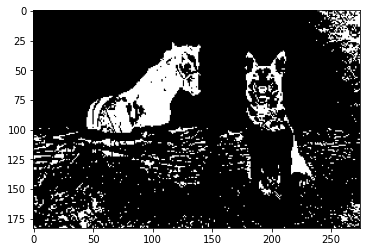

In [16]:

h, w, c = sel.shape
gris = np.zeros(sel.shape)
for i in range (h):
    for j in range (w):
        val= np.max(sel[i,j])
        if (val<100):
            gris[i,j]= 255
        else:
            gris[i,j]=0

plt.imshow(gris)

También podemos sumar los valores de los pixeles de cada línea o columna, para detectar por ejemplo si hay una zona más oscura que otras, zonas con texto escrito, ...

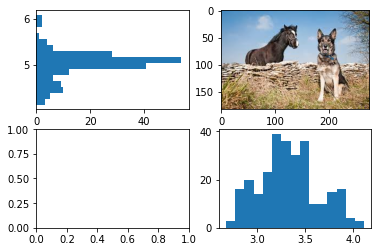

In [18]:

gray = cv.cvtColor(sel, cv.COLOR_RGB2GRAY)
fig, ax = plt.subplots(2,2)
ax[0,1].imshow(sel )
hist = np.sum(gray, axis=1)

ax[0,0].hist(hist/32/255,bins = 15, orientation = "horizontal")
hist = np.sum(gray, axis=0)
ax[1,1].hist(hist/32/255,bins =15)

plt.show()

# K-MEANS

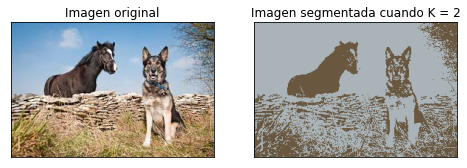

In [19]:
vectorized = sel.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2 
attempts=10
ret,label,center=cv.kmeans(vectorized,K,None,criteria,attempts,cv.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((sel.shape))
figure_size = 8
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(sel)
plt.title('Imagen original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Imagen segmentada cuando K = %i' % K), plt.xticks([]), plt.yticks([])

plt.show()

Probamos con Silhouette para verificar que hemos elegido el valor adecuado de k:

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
no_of_clusters = [2, 3, 4, 5, 6] 
values = np.array([1])
  
for n_clusters in no_of_clusters: 
  
    cluster = KMeans(n_clusters = n_clusters, n_init=10) 
    cluster_labels = cluster.fit_predict(vectorized) 
  
    # The silhouette_score  da el valor medio de todas las muestras 
    silhouette_avg = silhouette_score(vectorized, cluster_labels) 
    print('Para k=',n_clusters ,' ->'  , silhouette_avg)
    np.append(values, silhouette_avg)



Para k= 2  -> 0.5214537


# Nearest Neighbor
Solo obtenemos un 10% de accuracy, lo mismo que intentar acertar aleatoriamente.
Con Convolutional Neural Networks sube al 95%.

¿Podemos mejorar el resultado del 10% preprocesando las imágenes sin cambiar de clasificador? Podemos usar todo lo aprendido de procesado de imágenes de este curso


In [ ]:
class NearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    # nearest neighbor recuerda los datos
    self.Xtr = X
    self.ytr = y

  def predict(self, X):
  
    num_test = X.shape[0]
   #creamos un vector de zeros con la misma longitud que X
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    # Se comparan todas las imágenes
    for i in range(num_test):
     
      # Se utiliza la distancia L1(Manhattan distance)
      #distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)

      #se utiliza la distancia L2
      distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))

      min_index = np.argmin(distances) # se obtiene la distancia más pequeña
      Ypred[i] = self.ytr[min_index] # toma la etiqueta del conjunto de entrenaminto más cercano

    return Ypred

In [ ]:
Xval_rows2 = Xtr_rows[:100 :] # toma los primeros 1000para validar
Yval2 = Ytr[:100]
Xtr_rows2 = Xtr_rows[-1000:, :] # toma los últimos 10000 para entrenamiento
Ytr2 = Ytr[-1000:]

nn = NearestNeighbor()
nn.train(Xtr_rows2, Ytr2)

Yval_predict = nn.predict(Xval_rows2)
acc = np.mean(Yval_predict == Yval2)
print('accuracy: %f' % (acc,))



